In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#### Quesiton 1

In [35]:
quality=pd.read_csv("HW1Q1.csv")
quality.head()

,Propensity,Actual Class,Predicted Class at Cut-off 0.25,Predicted Class at Cut-off 0.75
0,0.03,0,0,0
1,0.52,0,1,0
2,0.38,0,1,0
3,0.82,1,1,1
4,0.33,0,1,0


#### 1.a

In [36]:
#confusion matrix for cut-off value 0.25
from sklearn.metrics import confusion_matrix,accuracy_score

actual1=quality["Actual Class"]
predicted1=quality["Predicted Class at Cut-off 0.25"]
cm1=confusion_matrix(actual1, predicted1)
print(cm1)

[[9 8]
 [0 3]]


In [37]:
#confusion matrix for cut-off value 0.75
actual2=quality["Actual Class"]
predicted2=quality["Predicted Class at Cut-off 0.75"]
cm2=confusion_matrix(actual2, predicted2)
print(cm2)

[[17  0]
 [ 1  2]]


#### 1.b

In [38]:
# performance evaluation for cut-off value 0.25
from sklearn import metrics

nrows=quality.shape[0]
PCC1=(cm1[1][1]+cm1[0][0])/nrows
errorRate1=1-PCC1
meanAbErr1 = metrics.mean_absolute_error(actual1, predicted1)
meanSqErr1 = metrics.mean_squared_error(actual1, predicted1)
rootMeanSqErr1 = metrics.mean_squared_error(actual1, predicted1, squared=False)
sensitivity1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
specificity1=cm1[1][1]/(cm1[1][1]+cm1[1][0])

print("Confusion matrix measure for cut-off value 0.25:")
print('PCC:', PCC1)
print("Error rate: ", errorRate1)
print('Mean Absolute Error:', meanAbErr1)
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)
print('Sensitivity:', sensitivity1)
print('Specificity:', specificity1)

Confusion matrix measure for cut-off value 0.25:
PCC: 0.6
Error rate:  0.4
Mean Absolute Error: 0.4
Mean Square Error: 0.4
Root Mean Square Error: 0.6324555320336759
Sensitivity: 0.5294117647058824
Specificity: 1.0


In [39]:
# performance evaluation for cut-off value 0.25
PCC2=(cm2[1][1]+cm2[0][0])/nrows
errorRate2=1-PCC2
meanAbErr2=metrics.mean_absolute_error(actual2, predicted2)
meanSqErr2=metrics.mean_squared_error(actual2, predicted2)
rootMeanSqErr2=metrics.mean_squared_error(actual2, predicted2, squared=False)
sensitivity2=cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity2=cm1[1][1]/(cm2[1][1]+cm2[1][0])

print("Confusion matrix measure for cut-off value 0.75:")
print('PCC:', PCC2)
print("Error rate: ", errorRate2)
print('Mean Absolute Error:', meanAbErr2)
print('Mean Square Error:', meanSqErr2)
print('Root Mean Square Error:', rootMeanSqErr2)
print('Sensitivity:', sensitivity2)
print('Specificity:', specificity2)

Confusion matrix measure for cut-off value 0.75:
PCC: 0.95
Error rate:  0.050000000000000044
Mean Absolute Error: 0.05
Mean Square Error: 0.05
Root Mean Square Error: 0.22360679774997896
Sensitivity: 1.0
Specificity: 1.0


#### 1.c

Please see the pdf document.

#### Question 2

In [40]:
pt=pd.read_csv("Paleontology.csv")
pt.head()

,Specimen ID,Age (Myr),X coordinate,Y-coordinate,Taxonomy,Brain size,Body size,Age group,Data source,Dating method
0,Arene Candide 4,0.011,8.3316,44.1643,Pleistocene Homo sapiens,1520.0,67.6,1,De Miguel & Henneberg 2001,C14
1,Arene Candide 5,0.011,8.3316,44.1643,Pleistocene Homo sapiens,1661.0,66.5,1,De Miguel & Henneberg 2001,C14
2,Arene Candide 2,0.012,8.3316,44.1643,Pleistocene Homo sapiens,1424.0,73.3,1,De Miguel & Henneberg 2001,C14
3,Oberkassel 1,0.014,7.1600,50.7150,Pleistocene Homo sapiens,1492.0,83.8,1,Neubauer et al. 2018,C14
4,Oberkassel 2,0.014,7.1600,50.7150,Pleistocene Homo sapiens,1330.0,75.1,1,Neubauer et al. 2018,C14


#### 2.a

My target variable would be Age, and my predicting variable woyld be Brian size, Body size and Age group.

#### 2.b

array([[<AxesSubplot:title={'center':'Brain size'}>]], dtype=object)

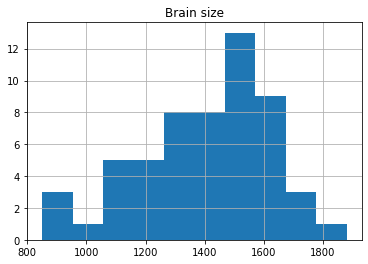

In [41]:
pt.hist(column="Brain size")

array([[<AxesSubplot:title={'center':'Body size'}>]], dtype=object)

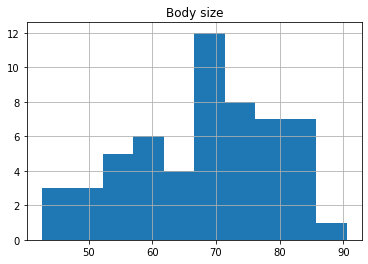

In [42]:
pt.hist(column="Body size")

array([[<AxesSubplot:title={'center':'Age group'}>]], dtype=object)

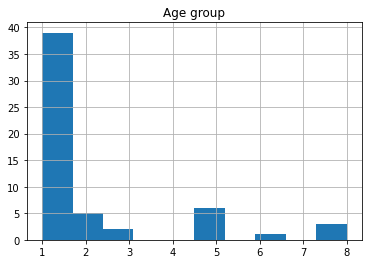

In [43]:
pt.hist(column="Age group")

array([[<AxesSubplot:title={'center':'Age (Myr)'}>]], dtype=object)

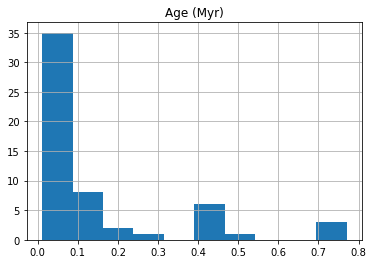

In [44]:
pt.hist(column="Age (Myr)")

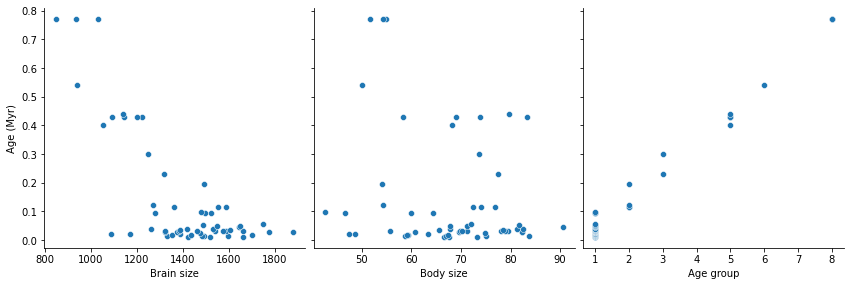

In [65]:
sns.pairplot(pt, x_vars=["Brain size", "Body size", "Age group"], y_vars='Age (Myr)', height=4, aspect=1, kind='scatter')
plt.show()

In [66]:
#find coorealtions between each variable
pt.corr()

,Age (Myr),X coordinate,Y-coordinate,Brain size,Body size,Age group
Age (Myr),1.000000,0.356414,-0.193218,-0.748410,-0.256243,0.992766
X coordinate,0.356414,1.000000,-0.574028,-0.419959,-0.555145,0.347407
Y-coordinate,-0.193218,-0.574028,1.000000,0.195552,0.378819,-0.175190
Brain size,-0.748410,-0.419959,0.195552,1.000000,0.416072,-0.756669
Body size,-0.256243,-0.555145,0.378819,0.416072,1.000000,-0.224130
Age group,0.992766,0.347407,-0.175190,-0.756669,-0.224130,1.000000


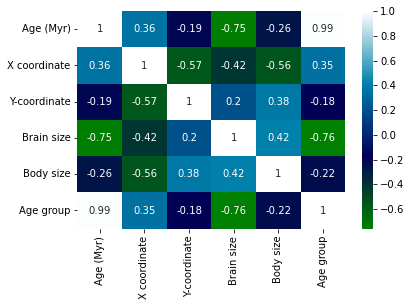

In [67]:
sns.heatmap(pt.corr(), annot = True, cmap = "ocean")
plt.show()

#### 2.c

#### 2.d.a

In [45]:
from sklearn.model_selection import train_test_split

x=pt[["Brain size", "Body size", "Age group"]]
y=pt["Age (Myr)"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)

In [46]:
x_train.head()

,Brain size,Body size,Age group
38,1497.0,64.4,1
51,1139.0,79.6,5
43,1270.5,54.2,2
47,1092.0,69.0,5
40,1554.5,72.4,2


In [47]:
X_test.head()

,Age (Myr),Brain size,Body size
33,0.048,1550.0,71.2
6,0.015,1484.0,66.9
52,0.540,940.0,50.0
49,0.430,1143.5,58.3
12,0.021,1090.0,47.4


#### 2.d.b

In [48]:
from sklearn.linear_model import LinearRegression

mlr=LinearRegression()
mlr.fit(x_train, y_train)

#print the coefficients and intercepts for the model
print(mlr.coef_)
print(mlr.intercept_)

list(zip(x, mlr.coef_))

[ 4.06916496e-05 -1.10079593e-03  1.04237804e-01]
-0.053280064061223376


[('Brain size', 4.0691649639745516e-05),
 ('Body size', -0.0011007959344957246),
 ('Age group', 0.10423780399210938)]

#### 2.d.c

In [49]:
y_pred_mlr= mlr.predict(x_test)  
v_pred_mlr= mlr.predict(x_train)

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
33,0.048,0.035653
6,0.015,0.037701
52,0.540,0.555357
49,0.430,0.450263
12,0.021,0.043134


In [50]:
rSquared=mlr.score(x,y)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr, squared=False)

print("R squared:", rSquared)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.9869217315249359
Mean Absolute Error: 0.02242492400591021
Mean Square Error: 0.0008117730782788592
Root Mean Square Error: 0.028491631723698438


#### 2.d.d

The R squared is 0.9865 which means 98.65% of the data is explained by this model, while both the values of MAE, MASE and RMSE are small, we can conclude that this is a good model.

#### 2.d.e

In [51]:
meanAbErr3 = metrics.mean_absolute_error(y_train, v_pred_mlr)
meanSqErr3 = metrics.mean_squared_error(y_train, v_pred_mlr)
rootMeanSqErr3 = metrics.mean_squared_error(y_train, v_pred_mlr, squared=False)

print('Mean Absolute Error:', meanAbErr3)
print('Mean Square Error:', meanSqErr3)
print('Root Mean Square Error:', rootMeanSqErr3)

Mean Absolute Error: 0.01631025675398531
Mean Square Error: 0.0004272831476725043
Root Mean Square Error: 0.020670828422501706


The values for model's error decreased compared to the fitted model, which are more close to 0.

#### 2.d.f

In [52]:
mlr.predict([[1453, 68, 1]])

C:\Users\tabby\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.03522858])

The age of the new specimen is 0.0357408 million year.

#### Question 3

#### 3.a

In [53]:
new=pt[["Taxonomy", "Brain size", "Body size", "Age (Myr)"]]
new.head(10)

,Taxonomy,Brain size,Body size,Age (Myr)
0,Pleistocene Homo sapiens,1520.0,67.6,0.011
1,Pleistocene Homo sapiens,1661.0,66.5,0.011
2,Pleistocene Homo sapiens,1424.0,73.3,0.012
3,Pleistocene Homo sapiens,1492.0,83.8,0.014
4,Pleistocene Homo sapiens,1330.0,75.1,0.014
5,Pleistocene Homo sapiens,1597.0,58.8,0.014
6,Pleistocene Homo sapiens,1484.0,66.9,0.015
7,Pleistocene Homo sapiens,1434.0,59.4,0.018
8,Pleistocene Homo sapiens,1700.0,67.4,0.018
9,Pleistocene Homo sapiens,1354.0,59.2,0.019


#### 3.b

In [54]:
X=pt[["Age (Myr)", "Brain size", "Body size"]]
Y=pt["Taxonomy"]

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.1, random_state=100)

In [55]:
X_train.head()

,Age (Myr),Brain size,Body size
11,0.021,1170.0,48.6
18,0.299,1249.0,73.7
0,0.011,1520.0,67.6
20,0.031,1663.0,79.4
55,0.770,937.5,54.3


In [56]:
X_test.head()

,Age (Myr),Brain size,Body size
33,0.048,1550.0,71.2
6,0.015,1484.0,66.9
52,0.540,940.0,50.0
49,0.430,1143.5,58.3
12,0.021,1090.0,47.4


#### 3.c

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
Y_pred = classifier.predict(X_test)
print(Y_test) 
print(Y_pred)

[1 2 0 0 2 2]
[2 2 0 0 2 2]


#### 3.d

In [60]:
cm3=confusion_matrix(Y_test, Y_pred)
ac3=accuracy_score(Y_test, Y_pred)

print(cm3)
print(ac3)

[[2 0 0]
 [0 0 1]
 [0 0 3]]
0.8333333333333334


The accuracy of this knn model with k=3 is 83.33%, which means that 83% correct decision has been made through this classsification.

#### 3.e

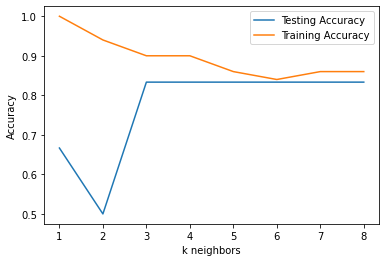

In [62]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')
plt.show()

#### 3.f

In [139]:
new_taxono = [[1453, 68, 0.33]]
new_taxono = classifier.predict(new_taxono)
new_taxono

array([0])

The new specimen is classified to the first taxonomy as Pleistocene Homo sapiens.